<a href="https://colab.research.google.com/github/AkshayK25/Internshala-Data-Science-Challenge/blob/master/insrance.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [0]:
import pandas as pd
import numpy as np
from sklearn.metrics import *

In [42]:
Train = pd.read_csv('/content/train_qnU1GcL.csv')
Train.shape

(79853, 12)

In [43]:
Train['perc_premium_paid_by_cash_credit']

0        0.429
1        0.010
2        0.917
3        0.049
4        0.052
5        0.540
6        1.000
7        1.000
8        0.621
9        0.908
10       0.051
11       0.033
12       1.000
13       0.111
14       0.027
15       0.963
16       0.055
17       0.125
18       0.012
19       0.000
20       0.455
21       0.229
22       0.307
23       0.880
24       0.870
25       0.030
26       0.000
27       0.000
28       0.000
29       0.036
         ...  
79823    0.752
79824    0.989
79825    0.107
79826    0.031
79827    0.634
79828    1.000
79829    0.000
79830    0.999
79831    0.377
79832    0.120
79833    0.062
79834    0.008
79835    0.070
79836    0.062
79837    0.114
79838    0.016
79839    0.764
79840    0.034
79841    0.958
79842    0.310
79843    0.454
79844    0.994
79845    0.825
79846    0.118
79847    0.033
79848    0.425
79849    0.704
79850    0.000
79851    0.398
79852    0.550
Name: perc_premium_paid_by_cash_credit, Length: 79853, dtype: float64

In [0]:
Train['age'] = Train['age_in_days']/365

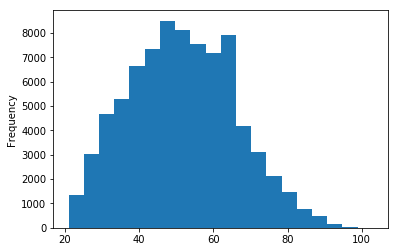

In [45]:
Train['age'].astype('int').plot(kind = 'hist',bins = 20)

In [46]:
Train['age'].describe()

count    79853.000000
mean        51.634786
std         14.270463
min         21.013699
25%         41.024658
50%         51.027397
75%         62.016438
max        103.019178
Name: age, dtype: float64

In [47]:
Train.query('age > 100')

,id,perc_premium_paid_by_cash_credit,age_in_days,Income,Count_3-6_months_late,Count_6-12_months_late,Count_more_than_12_months_late,application_underwriting_score,no_of_premiums_paid,sourcing_channel,residence_area_type,target,age
5045,7248,0.010,37240,99060,0.0,0.0,0.0,99.89,5,A,Urban,1,102.027397
19085,67942,0.110,37239,102580,0.0,0.0,0.0,99.27,9,B,Urban,1,102.024658
26029,48348,0.026,36870,50050,0.0,0.0,0.0,99.87,7,A,Rural,1,101.013699
38401,44175,0.003,36874,86570,2.0,0.0,0.0,NaN,8,A,Rural,0,101.024658
38441,111319,1.000,37602,48130,0.0,0.0,0.0,NaN,5,A,Rural,1,103.019178


In [48]:
Train.query('perc_premium_paid_by_cash_credit == 1.0')['target'].value_counts()

1    4025
0     979
Name: target, dtype: int64

In [0]:
train_ref = Train.query('perc_premium_paid_by_cash_credit < 1.0')

In [0]:
train_ref = train_ref.reset_index(drop = True)

In [51]:
train_ref.shape

(74849, 13)

In [52]:
train_ref['Income'].describe()

count    7.484900e+04
mean     2.133745e+05
std      5.112393e+05
min      2.403000e+04
25%      1.125400e+05
50%      1.720600e+05
75%      2.558100e+05
max      9.026260e+07
Name: Income, dtype: float64

In [0]:
train_ref['count_3plus'] = train_ref['Count_3-6_months_late'] + train_ref['Count_6-12_months_late']+train_ref['Count_more_than_12_months_late']

In [0]:
train_ref['count_6plus'] = train_ref['Count_6-12_months_late']+train_ref['Count_more_than_12_months_late']

In [0]:
train_ref['act_premiums'] = train_ref['count_3plus'] + train_ref['no_of_premiums_paid']

In [0]:
train_ref['perc_premium_paid_ontime'] = train_ref['no_of_premiums_paid']/train_ref['act_premiums']

In [0]:
train_ref['perc_premium_paid_atoneinst']=train_ref['perc_premium_paid_by_cash_credit']/train_ref['act_premiums']

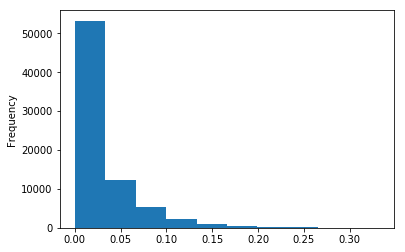

In [59]:
train_ref['perc_premium_paid_atoneinst'].plot(kind= 'hist')

In [60]:
train_ref.query('perc_premium_paid_atoneinst>0.10')['act_premiums'].value_counts()

6.0    762
7.0    750
5.0    640
8.0    619
4.0    421
9.0    364
3.0    158
Name: act_premiums, dtype: int64

In [61]:
train_ref.query('perc_premium_paid_atoneinst > 0.30')

,id,perc_premium_paid_by_cash_credit,age_in_days,Income,Count_3-6_months_late,Count_6-12_months_late,Count_more_than_12_months_late,application_underwriting_score,no_of_premiums_paid,sourcing_channel,residence_area_type,target,age,count_3plus,count_6plus,act_premiums,perc_premium_paid_ontime,perc_premium_paid_atoneinst
848,87604,0.936,10596,120140,0.0,0.0,0.0,99.82,3,A,Urban,1,29.030137,0.0,0.0,3.0,1.0,0.312000
1984,54704,0.951,7670,93110,0.0,0.0,0.0,99.88,3,A,Rural,1,21.013699,0.0,0.0,3.0,1.0,0.317000
2800,55763,0.938,9498,24150,0.0,0.0,0.0,99.85,3,A,Urban,1,26.021918,0.0,0.0,3.0,1.0,0.312667
3498,48645,0.994,22638,282030,0.0,0.0,0.0,99.89,3,B,Urban,1,62.021918,0.0,0.0,3.0,1.0,0.331333
8224,107891,0.921,9131,77440,0.0,0.0,0.0,99.88,3,A,Rural,1,25.016438,0.0,0.0,3.0,1.0,0.307000
8239,52951,0.902,9860,137110,0.0,0.0,0.0,99.80,3,A,Urban,1,27.013699,0.0,0.0,3.0,1.0,0.300667
12579,78851,0.978,20812,475140,0.0,0.0,0.0,99.73,3,A,Urban,1,57.019178,0.0,0.0,3.0,1.0,0.326000
12873,53204,0.982,17163,36010,0.0,0.0,0.0,99.87,3,A,Rural,0,47.021918,0.0,0.0,3.0,1.0,0.327333
12880,59949,0.905,9867,163860,0.0,0.0,0.0,NaN,3,A,Rural,1,27.032877,0.0,0.0,3.0,1.0,0.301667
19944,95175,0.920,13884,60260,0.0,0.0,0.0,99.89,3,B,Rural,0,38.038356,0.0,0.0,3.0,1.0,0.306667


In [0]:
train_ref['total_premiums_tobepaid']= 1.0/train_ref['perc_premium_paid_atoneinst']

In [0]:
train_ref['total_premiums_tobepaid'].replace({np.inf:np.nan},inplace = True)

In [0]:
train_ref['premium_left'] = train_ref['total_premiums_tobepaid'] - train_ref['act_premiums']

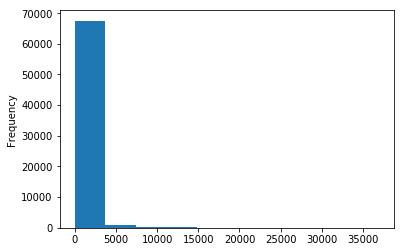

In [66]:
train_ref['premium_left'].plot(kind = 'hist')

In [0]:
train_ref['residence_area_type'] = train_ref['residence_area_type'].apply(lambda x:1 if x == 'Urban'else 0)

In [0]:
train_ref2 = pd.get_dummies(train_ref)

In [0]:
import xgboost as xgb


In [0]:
train_ref2['uw_score']= train_ref['application_underwriting_score']-90


In [71]:
!pip install hyperopt

In [0]:
def train_ref_transformation(train_ref):
      train_ref['age'] = train_ref['age_in_days']/365
      train_ref['count_3plus'] = train_ref['Count_3-6_months_late'] + train_ref['Count_6-12_months_late'] + train_ref['Count_more_than_12_months_late'] 
      train_ref['count_6plus'] = train_ref['Count_6-12_months_late'] + train_ref['Count_more_than_12_months_late'] 
      train_ref['act_premiums'] = train_ref['count_3plus'] + train_ref['no_of_premiums_paid']
      train_ref['perc_premium_paid_ontime'] = train_ref['no_of_premiums_paid'] / train_ref['act_premiums'] 
      train_ref['perc_premium_paid_atoneinst'] = train_ref['perc_premium_paid_by_cash_credit'] / train_ref['act_premiums'] 
      train_ref['total_premiums_tobepaid'] = 1.0 / (train_ref['perc_premium_paid_atoneinst'])
      train_ref['residence_area_type'] = train_ref['residence_area_type'].apply(lambda x:1 if x == 'Urban' else 0)
      train_ref['uw_score'] = train_ref['application_underwriting_score'] - 90
      return pd.get_dummies(train_ref)

In [0]:
def modelfit(alg, dtrain, predictors,target,useTrainCV=True, cv_folds=5, early_stopping_rounds=100):
    
    if useTrainCV:
        xgb_param = alg.get_xgb_params()
        xgtrain = xgb.DMatrix(dtrain[predictors].values, label=dtrain[target].values)
        cvresult = xgb.cv(xgb_param, xgtrain, num_boost_round=alg.get_params()['n_estimators'], nfold=cv_folds,
            metrics='auc', early_stopping_rounds=early_stopping_rounds)
        alg.set_params(n_estimators=cvresult.shape[0])
        #Fit the algorithm on the data
        alg.fit(dtrain[predictors], dtrain[target],eval_metric='auc')
        
    #Predict training set:
        dtrain_predictions = alg.predict(dtrain[predictors])
        dtrain_predprob = alg.predict_proba(dtrain[predictors])[:,1]
        
    #Print model report:
    print ("\nModel Report")
    print ("Accuracy : %.4g" % metrics.accuracy_score(dtrain[target].values, dtrain_predictions))
    print ("AUC Score (Train): %f" % metrics.roc_auc_score(dtrain[target], dtrain_predprob))
    return alg

In [0]:
from sklearn import metrics

In [0]:
sel = ['perc_premium_paid_by_cash_credit', 'Income',
       'Count_3-6_months_late', 'Count_6-12_months_late',
       'Count_more_than_12_months_late', 
       'no_of_premiums_paid', 'residence_area_type', 'age',
        'act_premiums','count_3plus','count_6plus',
       'perc_premium_paid_ontime', 'perc_premium_paid_atoneinst',
       'sourcing_channel_A',
       'sourcing_channel_B', 'sourcing_channel_C', 'sourcing_channel_D',
       'sourcing_channel_E','uw_score']

In [78]:

xgb1 = xgb.XGBClassifier(
 learning_rate =0.01,
 n_estimators=1000,
 max_depth= 10 ,
 min_child_weight=5,
 gamma=0,
 subsample=0.9,
 colsample_bytree=0.8,
 #colsample_bylevel = 0.5,
 objective= 'binary:logistic',
 nthread=4,
 #scale_pos_weight=1,
 seed=27)
alg = modelfit(xgb1, train_ref2 , sel , 'target' , cv_folds= 5) 


Model Report
Accuracy : 0.955
AUC Score (Train): 0.882333


In [0]:
tr_ref = train_ref.copy()

In [0]:
test = pd.read_csv('/content/test_QaJU1Mh.csv')

In [0]:
test2 = train_ref_transformation(test)

In [0]:
test2['target']=alg.predict_proba(test2[sel])[:,1]

In [0]:
test2[['id','target']].to_csv('Insurance_Challenge.csv',index=False)